<a href="https://colab.research.google.com/github/Jack-Christopher/Life-Expectancy/blob/master/Practica_Calificada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocesamiento de Datos


In [ ]:
import pandas as pd
data = pd.read_csv("https://gitlab.com/pcalcina/test/-/raw/main/weatherHistory.csv")  # dataframe


In [ ]:
H_T = data[['Humidity', 'Temperature (C)']]
H_T

,Humidity,Temperature (C)
0,0.89,9.472222
1,0.86,9.355556
2,0.89,9.377778
3,0.83,8.288889
4,0.83,8.755556
...,...,...
96448,0.43,26.016667
96449,0.48,24.583333
96450,0.56,22.038889
96451,0.60,21.522222


1. Mostrar un histograma de las columnas Humidity y Temperature 

In [ ]:
import matplotlib.pyplot as plot

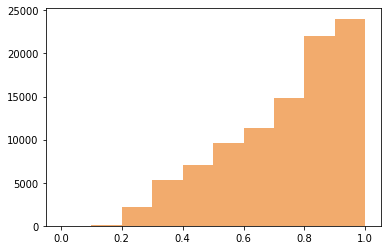

In [ ]:
plot.hist(x=H_T['Humidity'], color='#F2AB6D')
plot.show()

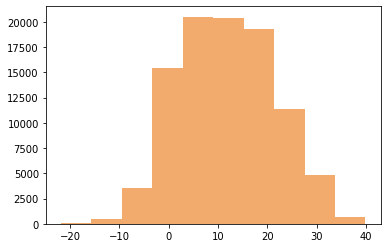

In [ ]:
plot.hist(x=H_T['Temperature (C)'], color='#F2AB6D')
plot.show()

2. Utilizar StandardScaler para normalizar los valores de las referidas columnas



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# transform data
scaled = scaler.fit_transform(H_T)
H_T = pd.DataFrame(scaled,columns = ['Humidity','Temperature (C)'])
H_T

,Humidity,Temperature (C)
0,0.793470,-0.257599
1,0.639996,-0.269814
2,0.793470,-0.267487
3,0.486521,-0.381489
4,0.486521,-0.332631
...,...,...
96448,-1.559811,1.474532
96449,-1.304020,1.324468
96450,-0.894753,1.058076
96451,-0.690120,1.003983


3. Utilizar los métodos de Mínimos Cuadrados (Linear Regression), RANSAC, Ridge y Lasso para predecir Temperature a partir de Humidity. Dividir el conjunto de datos en entrenamiento y test, siendo el conjunto de test el 30% de todo el conjunto de datos

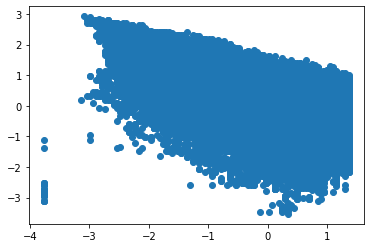

In [ ]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

plot.scatter(H_T['Humidity'],H_T['Temperature (C)'])


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression, RANSACRegressor, Ridge, Lasso

X = H_T['Humidity'].to_numpy().reshape(-1, 1)
y = H_T['Temperature (C)'].to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)


ransac = RANSACRegressor(base_estimator=LinearRegression(),
                         min_samples=500, max_trials=100, loss='absolute_loss', 
                         random_state=42, residual_threshold=None)
# Fit the model
ransac.fit(X_train, y_train)


linear_model = LinearRegression(fit_intercept=True)
# Fit the model
linear_model.fit(X_train, y_train)


ridge_model = Ridge(alpha=0.05)
# Fit the model
ridge_model.fit(X_train, y_train)


lasso_model = Lasso(alpha=0.05)
# Fit the model
lasso_model.fit(X_train, y_train)

#line_X = np.arange(0, 1.0, 0.01)

#line_y_ransac = ransac.predict(line_X[:, np.newaxis])
#line_y_linear = linear_model.predict(line_X[:, np.newaxis])
#line_y_ridge = ridge_model.predict(line_X[:, np.newaxis])
#line_y_lasso = lasso_model.predict(line_X[:, np.newaxis])

line_y_ransac = ransac.predict(X_test)
line_y_linear = linear_model.predict(X_test)
line_y_ridge = ridge_model.predict(X_test)
line_y_lasso = lasso_model.predict(X_test)




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ransac.py:358: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  FutureWarning,


4. Crear un DataFrame para comparar los referidos métodos utilizando las métricas MAE, MSE y RMSE

## Functions

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    #print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
from sklearn.linear_model import LinearRegression, RANSACRegressor, Ridge, Lasso

ransac_test_pred = ransac.predict(X_test)
linear_test_pred = linear_model.predict(X_test)
ridge_test_pred = ridge_model.predict(X_test)
lasso_test_pred = lasso_model.predict(X_test)

ransac_train_pred = ransac.predict(X_train)
linear_train_pred = linear_model.predict(X_train)
ridge_train_pred = ridge_model.predict(X_train)
lasso_train_pred = lasso_model.predict(X_train)

print('===================== Linear =====================')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, linear_test_pred)
print('------------------------------------')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, linear_train_pred)
print()

print('===================== RANSAC =====================')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, ransac_test_pred)
print('------------------------------------')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, ransac_train_pred)
print()

print('===================== RIDGE =====================')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, ridge_test_pred)
print('------------------------------------')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, ridge_train_pred)
print()

print('===================== LASSO =====================')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, lasso_test_pred)
print('------------------------------------')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, lasso_train_pred)


===================== Linear =====================
Test set evaluation:
_____________________________________
MAE: 0.6316604285871849
MSE: 0.6001022111746226
RMSE: 0.7746626434614119
__________________________________
------------------------------------
Train set evaluation:
_____________________________________
MAE: 0.6317386412687612
MSE: 0.600321314868009
RMSE: 0.7748040493363525
__________________________________

===================== RANSAC =====================
Test set evaluation:
_____________________________________
MAE: 0.6318825733673267
MSE: 0.6208557886887163
RMSE: 0.7879440263678101
__________________________________
------------------------------------
Train set evaluation:
_____________________________________
MAE: 0.6305987732853221
MSE: 0.6205899231259999
RMSE: 0.7877752998958523
__________________________________

===================== RIDGE =====================
Test set evaluation:
_____________________________________
MAE: 0.6316604545621912
MSE: 0.6001022074378

In [ ]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, linear_test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
#results_df


results_df_2 = pd.DataFrame(data=[["RANSAC Regression", *evaluate(y_test, ransac_test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
#results_df

results_df_3 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, ridge_test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_3, ignore_index=True)
#results_df

results_df_4 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, lasso_test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_4, ignore_index=True)

results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.631660,0.600102,0.774663,0.396148,0.391105
1,RANSAC Regression,0.631883,0.620856,0.787944,0.375265,0.327998
2,Ridge Regression,0.631660,0.600102,0.774663,0.396148,0.391105
3,Lasso Regression,0.635893,0.602175,0.775999,0.394062,-0.004564


5. Hacer un gráfico comparando las predicciones de todos los métodos, utilizando un color diferente para cada método. Los gráficos deberán mostrarse encima de un scatter plot de los valores originales.

No handles with labels found to put in legend.


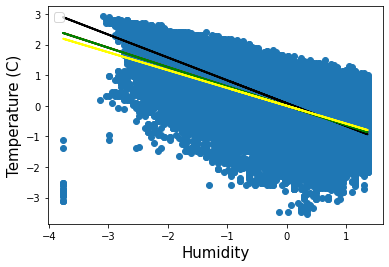

In [ ]:
plot.scatter(H_T['Humidity'],H_T['Temperature (C)'])

plot.plot(X_test, line_y_linear, color='red', lw=2)
plot.plot(X_test, line_y_ransac, color='black', lw=2)
plot.plot(X_test, line_y_ridge, color='green', lw=2)
plot.plot(X_test, line_y_lasso, color='yellow', lw=2)

plot.xlabel('Humidity', fontsize=15)
plot.ylabel('Temperature (C)', fontsize=15)
plot.legend(loc='upper left', fontsize=12)

plot.show()